# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Background
PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

## Task 1



For every column in the data:

a. State whether the values match the description given in the table above.

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not
match.

![image](image.png)



**product_id** - no adjustment made since index is 1459 and product_id ended in 1460 as expected

**category** - column is split into 6 category(Equipment, Food, Toys, Medicine, Housing, and Accesory) but has 25 '-' values and relaced  to 'unknown'

**animal** -colum split into 4 category with no missing values, and no adjustment has been made.

**size** - there is a value inconsistency in size column such as (medium, MEDIUM, large, Large), adjusted to a uniform lower case on all categories

**price** - there is 150 'unlisted' in price column and replaced with overall median price of 28.06

**sales** - no null values and rounded to 2 decimal places

**rating** - rating has 150 NULL values and assigned 0 to Null, now the range is from 0-9 with no decimal places as expected.

**repeat_purchase** - Assigned values of 'yes' to 1 and 'no' to 0.

In [2]:
import pandas as pd
import numpy as np
pet_supplies_2212df = pd.read_csv('pet_supplies_2212.csv') 
#pet_supplies_2212df.head(50)

# category with '-' values and relaced  to 'unknown'
pet_supplies_2212df['category'] = pet_supplies_2212df['category'].replace('-', 'unknown')

# make all size column values uniform to lower case
pet_supplies_2212df['size'] = pet_supplies_2212df['size'].str.lower()

#change the 'unlisted' string to the median of existing price.
pet_supplies_2212df['price'] = pd.to_numeric(pet_supplies_2212df['price'], errors='coerce')
median_price = np.median(pet_supplies_2212df['price'].dropna())
pet_supplies_2212df['price'] = pet_supplies_2212df['price'].fillna(median_price)

#rounding to 2 decimal places
pet_supplies_2212df['price'] = pet_supplies_2212df['price'].round(2)
pet_supplies_2212df['sales'] = pet_supplies_2212df['sales'].round(2)


#fill NULL with 0
pet_supplies_2212df['rating'] = pet_supplies_2212df['rating'].fillna(0)

#repeat_purchase change to 'yes' and 'no'
pet_supplies_2212df['repeat_purchase'] = pet_supplies_2212df['repeat_purchase'].replace(1, 'yes')
pet_supplies_2212df['repeat_purchase'] = pet_supplies_2212df['repeat_purchase'].replace(0, 'no')

#Review of the Changes
pet_supplies_2212df.head(100)
  

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,yes
1,2,Housing,Bird,medium,35.98,963.60,6.0,no
2,3,Food,Dog,medium,31.23,898.30,5.0,yes
3,4,Medicine,Cat,small,24.95,982.15,6.0,yes
4,5,Housing,Cat,small,26.18,832.63,7.0,yes
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,medium,21.14,617.64,7.0,yes
96,97,Accessory,Bird,large,42.99,1417.24,5.0,no
97,98,Equipment,Cat,small,27.95,1026.77,6.0,yes
98,99,Equipment,Dog,large,38.00,1447.26,5.0,no


## Task 2

Create a visualization that shows how many products are repeat purchases. Use the
visualization to:

a. State which category of the variable repeat purchases has the most
observations

b. Explain whether the observations are balanced across categories of the
variable repeat purchases

## How many observations of repeated purchase in the dataframe.?

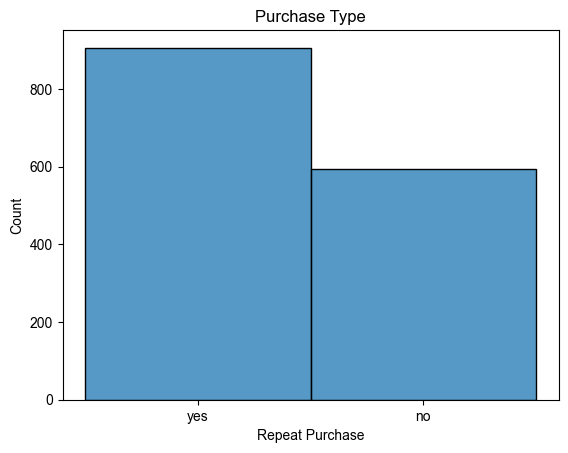

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=pet_supplies_2212df, x='repeat_purchase')
plt.xlabel("Repeat Purchase")
plt.ylabel("Count")
plt.title('Purchase Type')
sns.set()
plt.show()

Upon analyzing the dataset, it is evident that the majority of observations correspond to repeat purchases, with a count of 906, whereas non-repeat purchases account for only 594.With repeat purchases accounting for a majority of the observations and comprising around 60% of the total observation, based on that we can now focus on repeated sales, and how it impact sales.

## Among the repeat purchases, which category has the highest number of observations?

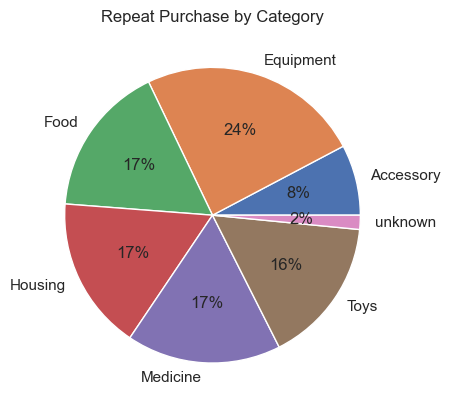

In [4]:
#Subset only repeat purchase 'yes'
repeat_purchases_yes = pet_supplies_2212df[pet_supplies_2212df['repeat_purchase'].isin(['yes'])]
categorize_repeat_purchases = repeat_purchases_yes.groupby('category')['repeat_purchase'].count().reset_index()

#Plotting pie chart
plt.pie(categorize_repeat_purchases['repeat_purchase'], 
        labels = categorize_repeat_purchases['category'],
        autopct='%.0f%%')
plt.title('Repeat Purchase by Category')
sns.set()
plt.show()


In [5]:
categorize_repeat_purchases

,category,repeat_purchase
0,Accessory,70
1,Equipment,221
2,Food,151
3,Housing,152
4,Medicine,153
5,Toys,145
6,unknown,14


The highest number of observations is in the category of "Equipment" with 24% of repeat purchase. This indicates that the equipment category has the most instances of repeat purchases in the dataset. Comparing with different categories, we can observe varying levels of repeat purchases, while the categories of "Food", "Housing", and "Medicine" all have an equal percentage of repeat purchases in the dataset.

## How does category compare to First purchase?

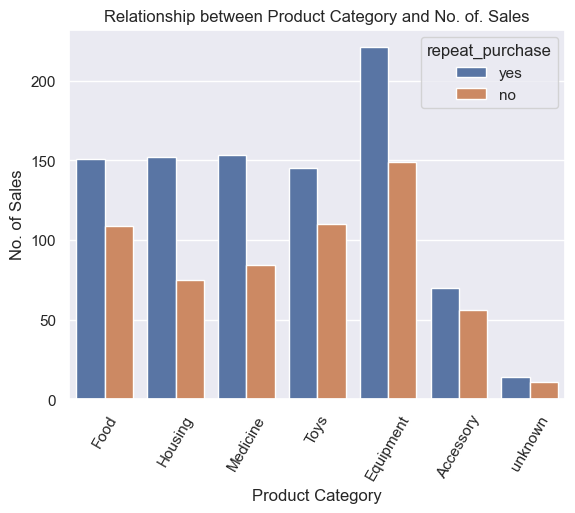

In [6]:
sns.countplot(data= pet_supplies_2212df, x = 'category', hue='repeat_purchase')
plt.xticks(rotation=60)
plt.xlabel('Product Category')
plt.ylabel('No. of Sales')
plt.title('Relationship between Product Category and No. of. Sales')
sns.set()
plt.show()


Based on previous chart, it is evident that repeat purchases account for a majority of the observations, with the "equipment" category being the most frequent. However, it is important to compare these repeat purchases with the first purchases.

While "equipment" is the most common category for repeat purchases indicated as "yes", it is also the highest category for initial purchases indicated as "no". Additionally, it is worth noting that the categories of "Food", "Housing", and "Medicine" all have an equal percentage of repeat purchases. However, despite having the same percentage, they may have varying numbers of first purchase observations. 

The comparison between repeat and first purchases reveals that "equipment" stands out as both the highest category for initial purchases and the most frequent category for repeat purchases. 


## Task 3

Describe the distribution of all of the sales. Your answer must include a visualization
that shows the distribution.

## What is the average or typical purchase amount?

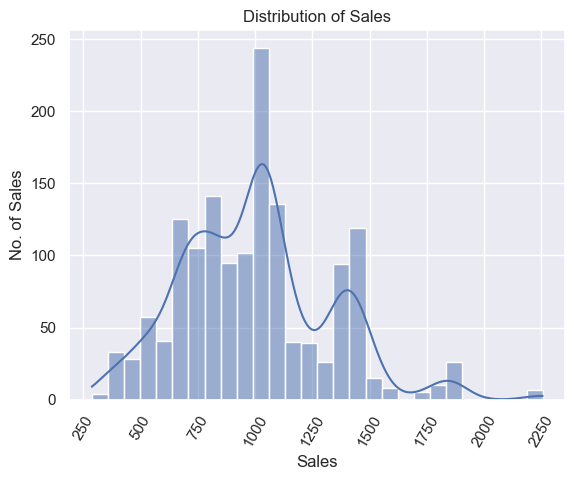

In [7]:
sns.histplot(data=pet_supplies_2212df, x='sales', kde=True)
plt.xlabel('Sales')
plt.ylabel('No. of Sales')
plt.title('Distribution of Sales')
plt.xticks(rotation=60)
sns.set()
plt.show()



The distribution of sales exhibits a peak around 1000 USD, indicating a relatively high frequency of sales at that value. The range of sales spans from 250 USD to 1800 USD, capturing the majority of the observations. However, there are some outliers where purchases exceed 2200 USD.

## What is the most profitable?

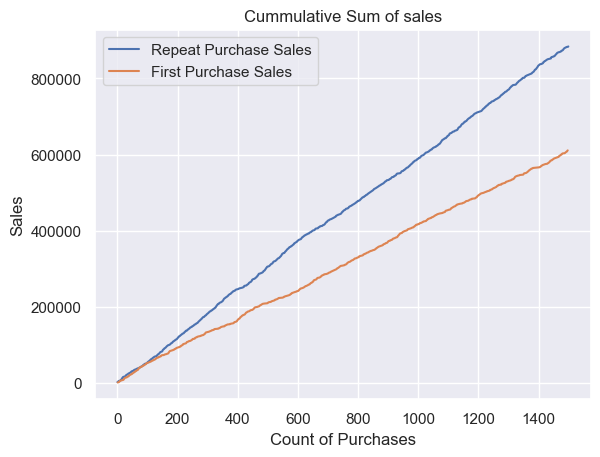

In [8]:
repeat_purchases_yes = pet_supplies_2212df[pet_supplies_2212df['repeat_purchase'].isin(['yes'])]
sales_cumsum_yes = repeat_purchases_yes['sales'].cumsum()

repeat_purchases_no = pet_supplies_2212df[pet_supplies_2212df['repeat_purchase'].isin(['no'])]
sales_cumsum_no = repeat_purchases_no['sales'].cumsum()

sales_cumsum_yes.plot()
sales_cumsum_no.plot()
plt.xlabel('Count of Purchases')
plt.ylabel('Sales')
plt.title('Cummulative Sum of sales')
plt.legend(['Repeat Purchase Sales', 'First Purchase Sales'])
sns.set()
plt.show()

Upon examining the plot, it becomes evident that the maximum sales value observed for repeat purchases is approximately 880,000. This suggests that some customers have made substantial purchases multiple times, leading to this higher value. On the other hand, the maximum sales value for first-time purchases is around 600,000, indicating that there are instances where customers make significant purchases as their initial transaction.

In summary, the plot demonstrates that repeat purchases in the dataset reach higher sales values compared to first-time purchases. Furthermore, the dataset contains a notable proportion of repeat purchases

## Task 4
Describe the relationship between repeat purchases and sales. Your answer must
include a visualization to demonstrate the relationship.

## Why repeat purchase has a higher sales?

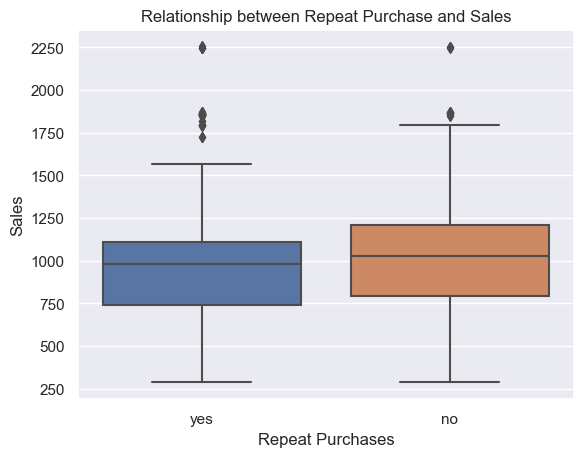

In [9]:

sns.boxplot(data= pet_supplies_2212df, x= 'repeat_purchase', y= 'sales')
plt.xlabel('Repeat Purchases')
plt.ylabel('Sales')
plt.title('Relationship between Repeat Purchase and Sales')
sns.set()
plt.show()

The relationship between repeat purchases and sales can be described based on the box plot visualization. The box plot reveals that the "repeat purchases" category, represented by the "yes" value, has a lower mean of sales compared to the "no" category, which represents initial purchases. There is a noticeable difference in the means of the two groups, indicating that initial purchases tend to have higher sales values on average compared to repeat purchases.

Furthermore, the box plot displays outliers in both categories, indicating a few observations with exceptionally high sales values. These outliers could represent unique or exceptional cases where sales significantly exceed the typical range for both repeat and initial purchases.

Overall, based on the box plot, it can be concluded that repeat purchases generally have lower sales values on average compared to initial purchases, but with the higher frequency of repeat purchases it is more profitable.